In [22]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#modelling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [23]:
#importing the csv file
df=pd.read_csv('stud.csv')

In [24]:

#top 5 of df
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

In [25]:
X=df.drop(columns=['math_score'],axis=1)

In [26]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [27]:
y=df['math_score']

In [28]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [29]:
#create transformer with 3 types of transformers
num_faetures=X.select_dtypes(exclude="object").columns
cat_faetures=X.select_dtypes(include="object").columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_faetures),
        ("StandardScaler",numeric_transformer,num_faetures)

    ]
)

In [30]:
X=preprocessor.fit_transform(X)

In [31]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [32]:
X.shape

(1000, 19)

In [34]:
#saperate data imto train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model traing

In [35]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [37]:
models={
    " Linear Regression":LogisticRegression(),
    "Lasso":Lasso(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    #make prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    #Evaluate Train and Test dataset
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for trainig set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolure Error: {:.4f}".format(model_train_mae))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("------------------------------------------------------")

    print("Model performance for test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolure Error: {:.4f}".format(model_test_mae))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')


 Linear Regression
Model performance for trainig set
- Root Mean Squared Error: 8.0338
- Mean Absolure Error: 5.7900
- Mean Squared Error: 64.5425
- R2 Score: 0.7137
------------------------------------------------------
Model performance for test set
- Root Mean Squared Error: 9.1449
- Mean Absolure Error: 7.2800
- Mean Squared Error: 83.6300
- R2 Score: 0.6563


Lasso
Model performance for trainig set
- Root Mean Squared Error: 6.5938
- Mean Absolure Error: 5.2063
- Mean Squared Error: 43.4784
- R2 Score: 0.8071
------------------------------------------------------
Model performance for test set
- Root Mean Squared Error: 6.5197
- Mean Absolure Error: 5.1579
- Mean Squared Error: 42.5064
- R2 Score: 0.8253


KNeighborsRegressor
Model performance for trainig set
- Root Mean Squared Error: 5.7079
- Mean Absolure Error: 4.5168
- Mean Squared Error: 32.5799
- R2 Score: 0.8555
------------------------------------------------------
Model performance for test set
- Root Mean Squared Error:

In [38]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,Random Forest Regressor,0.854692
6,CatBoostRegressor,0.851632
7,AdaBoost Regressor,0.850053
5,XGBRegressor,0.827797
1,Lasso,0.825320
2,KNeighborsRegressor,0.783813
3,Decision Tree,0.716013
0,Linear Regression,0.656322


In [39]:
RF_model=RandomForestRegressor()
RF_model=RF_model.fit(X_train,y_train)
y_pred=RF_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model id %.2f"%score)

Accuracy of the model id 85.24


#### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

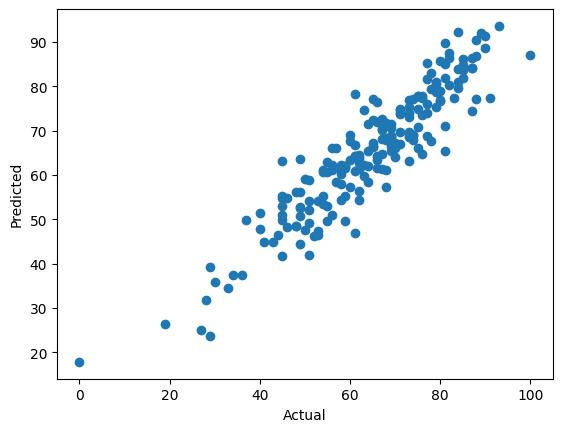

In [40]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

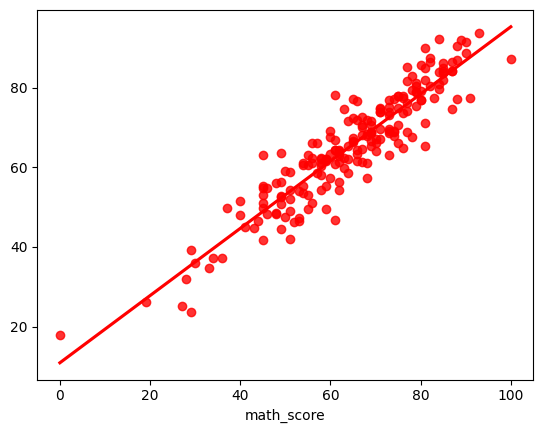

In [41]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [42]:
#difference between actual and predicted
pred_df=pd.DataFrame({'Actual Value': y_test,"Predicted Value":y_pred,"Difference":y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,77.28,13.72
737,53,54.07,-1.07
740,80,76.95,3.05
660,74,77.22,-3.22
411,84,79.70,4.30
...,...,...,...
408,52,46.31,5.69
332,62,61.39,0.61
208,74,67.87,6.13
613,65,67.24,-2.24
